In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import ast
import seaborn as sns
%matplotlib inline 

In [64]:
#laoding the dataset
df_doc_reports = pd.read_csv('doc_reports.csv')
df_facial_similarity_reports = pd.read_csv('facial_similarity_reports.csv')

In [65]:
df_doc_reports.head(5)

,Unnamed: 0,user_id,result,visual_authenticity_result,image_integrity_result,face_detection_result,image_quality_result,created_at,supported_document_result,conclusive_document_quality_result,colour_picture_result,data_validation_result,data_consistency_result,data_comparison_result,attempt_id,police_record_result,compromised_document_result,properties,sub_result
0,0,ab23fae164e34af0a1ad1423ce9fd9f0,consider,consider,clear,clear,clear,2017-06-20T23:12:57Z,clear,NaN,NaN,clear,clear,NaN,050a0596de424fab83c433eaa18b3f8d,clear,NaN,"{'gender': 'Male', 'nationality': 'IRL', 'docu...",caution
1,1,15a84e8951254011b47412fa4e8f65b8,clear,clear,clear,clear,clear,2017-06-20T23:16:04Z,clear,NaN,NaN,clear,NaN,NaN,f69c1e5f45a64e50a26740b9bfb978b7,clear,NaN,"{'gender': 'Female', 'document_type': 'driving...",clear
2,2,ffb82fda52b041e4b9af9cb4ef298c85,clear,clear,clear,clear,clear,2017-06-20T17:59:49Z,clear,NaN,NaN,clear,clear,NaN,f9f84f3055714d8e8f7419dc984d1769,clear,NaN,"{'gender': 'Male', 'nationality': 'ITA', 'docu...",clear
3,3,bd4a8b3e3601427e88aa1d9eab9f4290,clear,clear,clear,clear,clear,2017-06-20T17:59:38Z,clear,NaN,NaN,clear,clear,NaN,10a54a1ecf794404be959e030f11fef6,clear,NaN,"{'gender': 'Male', 'issuing_date': '2007-08', ...",clear
4,4,f52ad1c7e69543a9940c3e7f8ed28a39,clear,clear,clear,clear,clear,2017-06-20T18:08:09Z,clear,NaN,NaN,clear,clear,NaN,1f320d1d07de493292b7e0d5ebfb1cb9,clear,NaN,"{'gender': 'Male', 'nationality': 'POL', 'docu...",clear


In [66]:
df_facial_similarity_reports.head(5)

,Unnamed: 0,user_id,result,face_comparison_result,created_at,facial_image_integrity_result,visual_authenticity_result,properties,attempt_id
0,0,ab23fae164e34af0a1ad1423ce9fd9f0,clear,clear,2017-06-20T23:12:58Z,clear,consider,{},050a0596de424fab83c433eaa18b3f8d
1,1,15a84e8951254011b47412fa4e8f65b8,clear,clear,2017-06-20T23:16:04Z,clear,clear,{},f69c1e5f45a64e50a26740b9bfb978b7
2,2,ffb82fda52b041e4b9af9cb4ef298c85,clear,clear,2017-06-20T17:59:49Z,clear,clear,{},f9f84f3055714d8e8f7419dc984d1769
3,3,bd4a8b3e3601427e88aa1d9eab9f4290,clear,clear,2017-06-20T17:59:39Z,clear,clear,{},10a54a1ecf794404be959e030f11fef6
4,4,f52ad1c7e69543a9940c3e7f8ed28a39,clear,clear,2017-06-20T18:08:09Z,clear,clear,{},1f320d1d07de493292b7e0d5ebfb1cb9


## EDA

In [67]:
print(set(df_doc_reports['user_id']).difference(df_facial_similarity_reports['user_id'])) # both the daatset has similar user id 

set()


In [68]:
print(set(df_doc_reports['attempt_id']).difference(df_facial_similarity_reports['attempt_id'])) # i dont know why there is different attempt id

{'9.6949E+31'}


In [69]:
docs_id = df_doc_reports['attempt_id']
facial_id = df_facial_similarity_reports['attempt_id']
for i in range(len(df_doc_reports)):
    if docs_id[i] != facial_id[i]:
        print('index: {}, doc_id: {}, face_id: {}'.format(
            i, docs_id[i], facial_id[i]))
# both the docs id and face id has same value os it is safe to merge the dataframes together.

index: 168513, doc_id: 9.6949E+31, face_id: 96948966045741509980950989095520


In [70]:
# merging both dataframe 
df_new = df_facial_similarity_reports.merge(df_doc_reports, on=df_facial_similarity_reports.index,)
df_new = df_new.drop(['key_0'], 1)

In [71]:
# create new columns name for df_new and rempove the columns that are duplicatred in both dataframes 
matched = set()
for col in df_new.columns:
    if "_x" in col or "_y" in col:
        name = col.replace("_x", "")
        name = name.replace("_y", "")
        matched.add(name)


def columns_comparison(col, df):
    return df[col + "_x"].equals(df[col + "_y"])


for name in matched:
    facial_similarity_col = name + "_x"
    docs_report_col = name + "_y"
    if columns_comparison(name, df_new):
        # Removing duplicated columns and renaming them. 
        df_new.rename({facial_similarity_col: name}, axis=1, inplace=True)
        df_new.drop(docs_report_col, inplace=True, axis=1)
    else:
        df_new.rename({facial_similarity_col: "face_" + name, docs_report_col: "docs_" +
                   name}, axis=1, inplace=True)
# i think unamed is dulpicated as the original idex from large data set index is extended to 181991 instead of 176403 attempts.

## Datetime formatting 

In [72]:
df_new.head()

,Unnamed: 0,user_id,face_result,face_comparison_result,face_created_at,facial_image_integrity_result,visual_authenticity_result,face_properties,face_attempt_id,docs_result,...,conclusive_document_quality_result,colour_picture_result,data_validation_result,data_consistency_result,data_comparison_result,docs_attempt_id,police_record_result,compromised_document_result,docs_properties,sub_result
0,0,ab23fae164e34af0a1ad1423ce9fd9f0,clear,clear,2017-06-20T23:12:58Z,clear,consider,{},050a0596de424fab83c433eaa18b3f8d,consider,...,NaN,NaN,clear,clear,NaN,050a0596de424fab83c433eaa18b3f8d,clear,NaN,"{'gender': 'Male', 'nationality': 'IRL', 'docu...",caution
1,1,15a84e8951254011b47412fa4e8f65b8,clear,clear,2017-06-20T23:16:04Z,clear,clear,{},f69c1e5f45a64e50a26740b9bfb978b7,clear,...,NaN,NaN,clear,NaN,NaN,f69c1e5f45a64e50a26740b9bfb978b7,clear,NaN,"{'gender': 'Female', 'document_type': 'driving...",clear
2,2,ffb82fda52b041e4b9af9cb4ef298c85,clear,clear,2017-06-20T17:59:49Z,clear,clear,{},f9f84f3055714d8e8f7419dc984d1769,clear,...,NaN,NaN,clear,clear,NaN,f9f84f3055714d8e8f7419dc984d1769,clear,NaN,"{'gender': 'Male', 'nationality': 'ITA', 'docu...",clear
3,3,bd4a8b3e3601427e88aa1d9eab9f4290,clear,clear,2017-06-20T17:59:39Z,clear,clear,{},10a54a1ecf794404be959e030f11fef6,clear,...,NaN,NaN,clear,clear,NaN,10a54a1ecf794404be959e030f11fef6,clear,NaN,"{'gender': 'Male', 'issuing_date': '2007-08', ...",clear
4,4,f52ad1c7e69543a9940c3e7f8ed28a39,clear,clear,2017-06-20T18:08:09Z,clear,clear,{},1f320d1d07de493292b7e0d5ebfb1cb9,clear,...,NaN,NaN,clear,clear,NaN,1f320d1d07de493292b7e0d5ebfb1cb9,clear,NaN,"{'gender': 'Male', 'nationality': 'POL', 'docu...",clear


In [73]:
# change fromatting of date so that we can analyse with pandas.
df_new["face_created_at"] = pd.to_datetime(df_new["face_created_at"])
df_new["docs_created_at"] = pd.to_datetime(df_new["docs_created_at"])

In [74]:
# checking the differance in craetion time of the documents and the facial check.
time_diff = df_new["face_created_at"] - df_new["docs_created_at"]
time_diff = pd.Series([i.total_seconds() for i in time_diff])
time_diff.value_counts()

 0.0    167121
 1.0      5775
-1.0      3507
-4.0         1
dtype: int64

In [75]:
# there is only one anamoly.
# documents check is created first in most of the cases.
# i think this time is somehow related to the API processing time and is in fraction of seconds, and 
# where one processing second in on the top of new second, and they have given same processing time.

In [76]:
df_new.face_created_at.max()

Timestamp('2017-10-31 23:54:24+0000', tz='UTC')

In [77]:
df_new.face_created_at.min()

Timestamp('2017-05-23 15:13:02+0000', tz='UTC')

In [78]:
#Arranging the dataframe in terms of time
df_new.sort_values(["face_created_at"], inplace=True)
df_new.reset_index(drop=True,inplace=True)

## adding a pass column to check if kyc passsed or not 

In [79]:
df_new.head(5)

,Unnamed: 0,user_id,face_result,face_comparison_result,face_created_at,facial_image_integrity_result,visual_authenticity_result,face_properties,face_attempt_id,docs_result,...,conclusive_document_quality_result,colour_picture_result,data_validation_result,data_consistency_result,data_comparison_result,docs_attempt_id,police_record_result,compromised_document_result,docs_properties,sub_result
0,49293,3aee7324dfba466d96888ff9ad185b58,clear,clear,2017-05-23 15:13:02+00:00,clear,clear,{'score': 0.73},d21de828c5514277aaedb316edc6c48c,clear,...,NaN,NaN,clear,NaN,clear,d21de828c5514277aaedb316edc6c48c,clear,NaN,"{'gender': 'Male', 'document_type': 'driving_l...",clear
1,26942,206b6bd0cc114844b471fb750e1c9b8c,consider,NaN,2017-05-23 15:18:05+00:00,consider,clear,{},b92d851b2380442cbe373c33f1c9dc44,clear,...,NaN,NaN,clear,clear,clear,b92d851b2380442cbe373c33f1c9dc44,NaN,NaN,"{'gender': 'Male', 'nationality': 'MLT', 'docu...",clear
2,55631,8edd77f60f8e4a739f35cb797b292e6d,consider,NaN,2017-05-23 15:22:16+00:00,consider,clear,{},b21d5797e8864adbb215182218094cfb,clear,...,NaN,NaN,clear,NaN,clear,b21d5797e8864adbb215182218094cfb,NaN,NaN,"{'document_type': 'driving_licence', 'date_of_...",clear
3,26943,636fb441d54446a8996e3ff79e09535f,clear,clear,2017-05-23 15:27:06+00:00,clear,clear,{'score': 0.79},63485edd8dca4d25b95d1dd4484b3bd6,consider,...,NaN,NaN,clear,clear,consider,63485edd8dca4d25b95d1dd4484b3bd6,clear,NaN,"{'gender': 'Female', 'nationality': 'PRT', 'do...",caution
4,26944,fffa227d01064f9f9cef396d893863c1,clear,clear,2017-05-23 15:27:56+00:00,clear,clear,{'score': 0.58},c991888dc7c044f2bfdfe058c3aaa45d,clear,...,NaN,NaN,clear,NaN,clear,c991888dc7c044f2bfdfe058c3aaa45d,clear,NaN,"{'gender': 'Male', 'document_type': 'driving_l...",clear


In [80]:
#if the result of facial and document similarity check are clear, 
# True for Facial Similarity Check result of 'clear'
facial_similarity_result = df_new["face_result"] == "clear"
# True for Document Check result of 'clear'
docs_check_result = df_new["docs_result"] == "clear"

df_new['Pass'] = facial_similarity_result & docs_check_result
# Pass column denotes if face_result and docs_result True is greter than or equal to that attempt passsed KYC
df_new.iloc[0, :]

Unnamed: 0                                                                        49293
user_id                                                3aee7324dfba466d96888ff9ad185b58
face_result                                                                       clear
face_comparison_result                                                            clear
face_created_at                                               2017-05-23 15:13:02+00:00
facial_image_integrity_result                                                     clear
visual_authenticity_result                                                        clear
face_properties                                                         {'score': 0.73}
face_attempt_id                                        d21de828c5514277aaedb316edc6c48c
docs_result                                                                       clear
image_integrity_result                                                            clear
face_detection_result           

## Dealing with all the multiple attempts by user

In [81]:
# pass rate is denoted as the number of customers who have passed both the kyc process divided by the number of customer who attempts the overall process.
#each of the user has given two attempt, and in order to get the accurate pass rate,
#we need to take the best result out of the first two attempts. 
single_attempt_users = df_new.drop_duplicates('user_id', False)
single_attempt_users.shape  
# most of the users have only attempted only once. 

(110374, 26)

In [82]:
attempts_count = df_new['user_id'].value_counts()
attempts_count.head()
attempts_count[attempts_count > 2].head()  
# 1232 users have had more than two attempts.

2df96cd3537d415a9e7f23f419197187    6
6eeb7dbdf1fa4e7c95413bc0608dd21c    6
0749e4cc340c45f3aae46080318fcc0b    5
7b83073845604ea3acb150e421977537    5
37942d5cef7f428381ba2d56eb9c0da6    5
Name: user_id, dtype: int64

In [83]:
# creating dataframe of the user with multiple attempts 
df_multiple = df_new[df_new.duplicated('user_id', keep=False)]
# 1st attempt of these users
df_multiple_1 = df_multiple.drop_duplicates(
    'user_id', 'first') 
# Final attempt of these users
df_multiple_final = df_multiple.drop_duplicates(
    'user_id', 'last')  
#some of the users have passed their first attempts and still retried
# only 5031 users
df_multiple_passed1 = df_multiple_1[df_multiple_1["Pass"]]

In [84]:
#creting a dataframe of users with multiple attempts who have failed their first attempts
df_multiple_failed1 = df_multiple_1[df_multiple_1['Pass'] == False]
#creating dataframe of the user with multiple attempts for their seconf attempts only
df_attempt_2 = df_multiple.groupby(
    ['user_id']).head(2).groupby(['user_id']).tail(1)
# df of only the 1st attempts of all user
df_single_attempt = df_new.drop_duplicates('user_id', 'first')

In [85]:
X1 = pd.concat([df_multiple_failed1, df_attempt_2])
X1 = X1.drop_duplicates('user_id', 'last')
# dropping the multiple attempts of the user who had multiple attempt,and keeping their second attempt only. 
X2 = pd.concat([df_single_attempt, X1])
X2 = X2.drop_duplicates('user_id', 'last')
#keeping the first attempty of all the users, and only the 2nd attempt of all the users who had multiple attempts
#but failed the first one, so that we can calculatw the accurate pass ratio.
df_kyc_pass_rate = X2.sort_values(["face_created_at"])
df_kyc_pass_rate.reset_index(drop=True, inplace=True)

In [86]:
len(df_new.drop_duplicates('user_id','first'))/len(df_new) 
# around 80% of attempts are not the repeated attempts
#using 'df_kyc_pass_rate'cf.'df_new' does not cahnge the trend of outcomes so will be using df_new in order 
# to have more data points to anlayze the trend in order to have info about why pass rate has decreased.
#I ran the notebook with df_kyc_pass_rate as well,
# and there were no changes to the conclusions.

0.8090746241581823

## Each day growth of attempts 

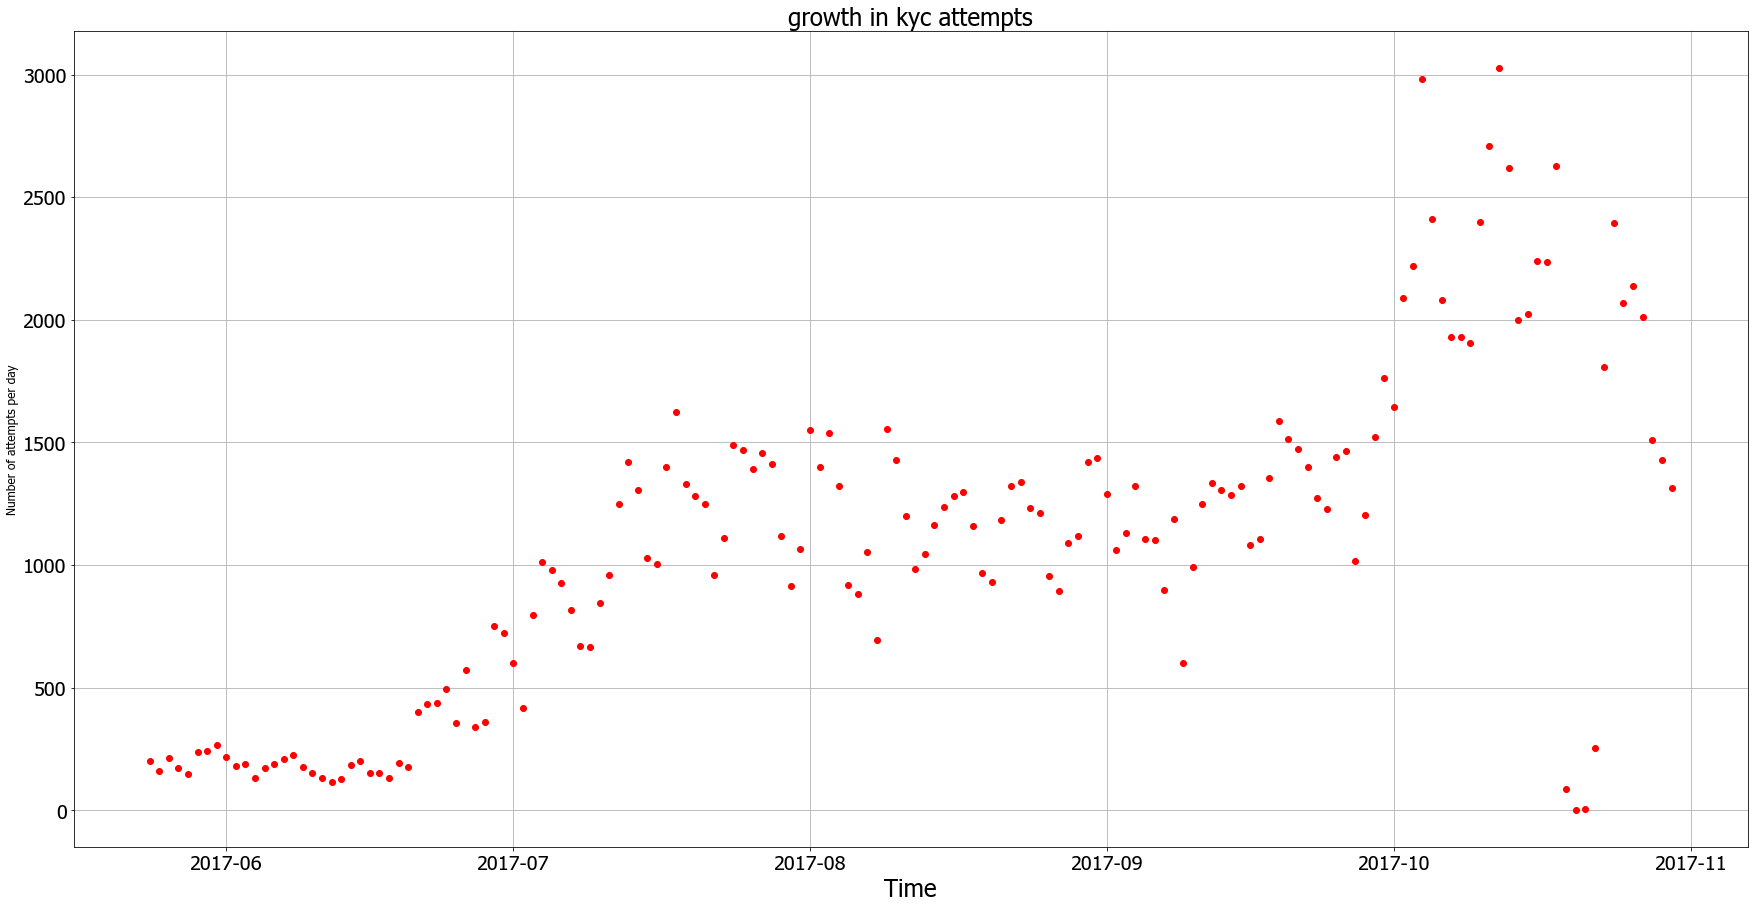

In [87]:
plt.rcParams['figure.figsize'] = (30, 15)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Tahoma']
plt.rcParams.update({'font.size': 20})
days_in_period = pd.date_range('2017-05-24', '2017-10-31',tz="Europe/Brussels", normalize=False)
day_bins = []
for k in range(len(days_in_period)-1):
    upper = df_new["docs_created_at"] < days_in_period[k+1]
    lower = df_new["docs_created_at"] > days_in_period[k]
    day_bins.append(len(df_new[upper & lower]))
plt.grid(b=True)
plt.plot(days_in_period[:-1], day_bins, 'ro')
plt.ylabel("Number of attempts per day", fontsize=12)
plt.xlabel("Time", fontsize=24)
plt.title('growth in kyc attempts')
plt.show()

In [88]:
#increment in number of growth per day is a prodcut of grwoth in number of users and it shows a
#positive relationship with the documents failure rate. 

## Diagnostics

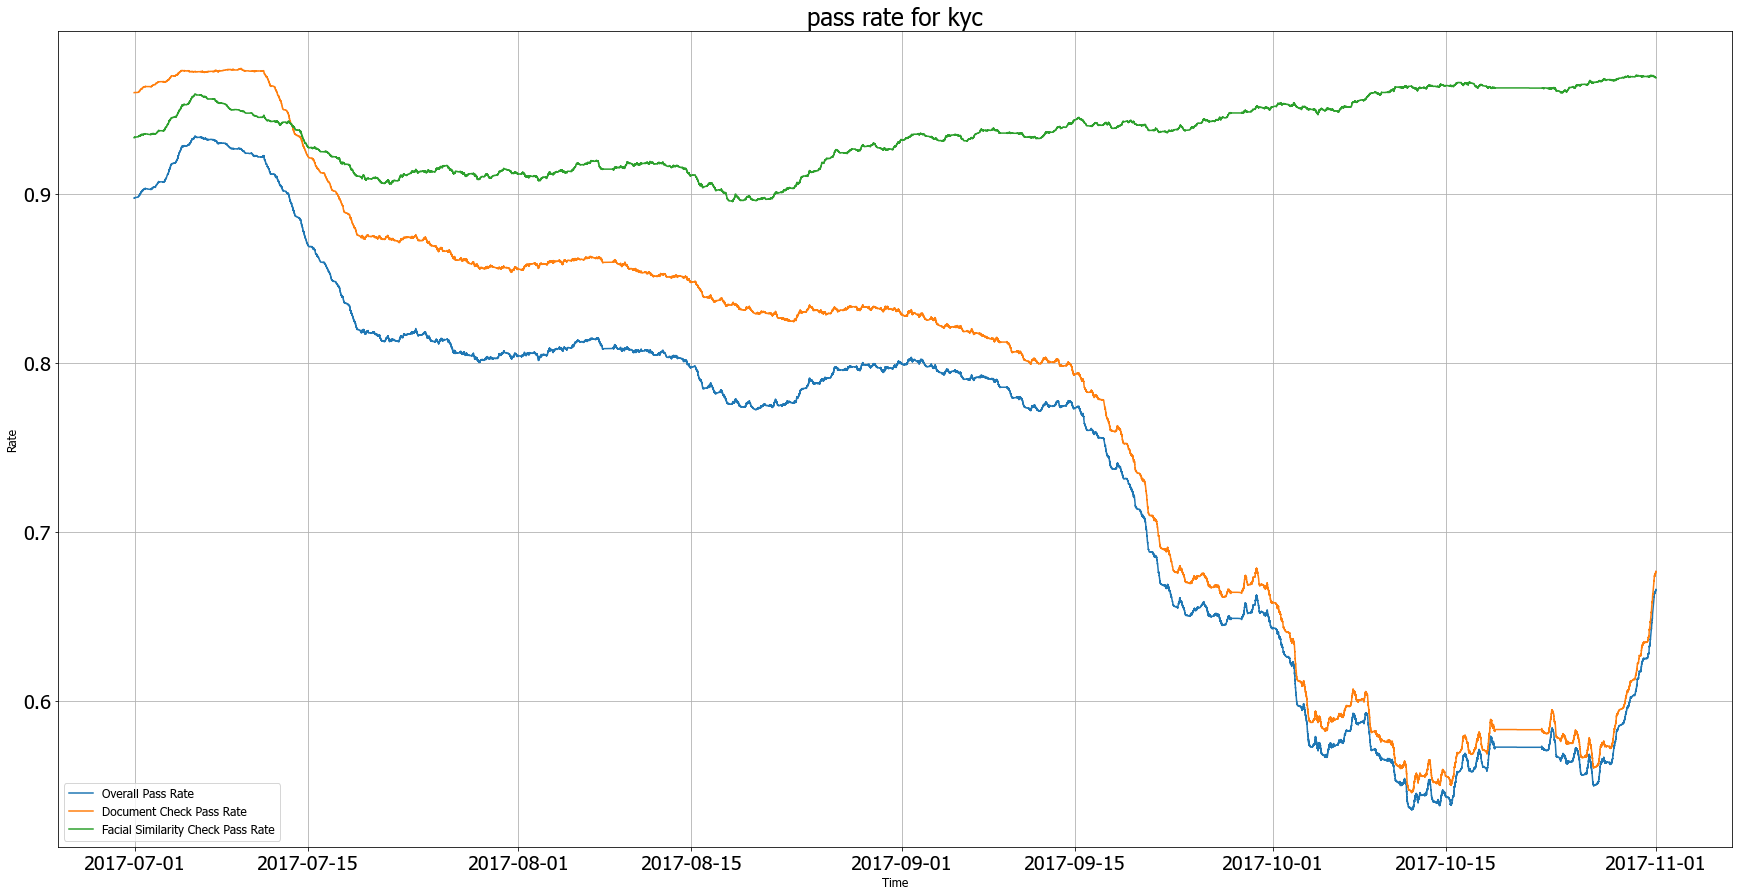

In [89]:
# ploting the visualization of overall pass rate, document check pass rate,facial similarity check pass rate,
#plotting the sub result, and at the  same time plot diocument failure rate.
#sub result is specific to the document result which proivdes information when it fails.
def moving_average(x,N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)
# efficient moving average algorithm


def plot_moving_average(variables,labels,title='',start=0,N=10000):
    time =  list(df_new["face_created_at"])
    for i in range(len(variables)):
        time =  list(df_new["face_created_at"])
        y = list(variables[i].astype(int))
        ma = moving_average(y,N)
        start_index = len(time) - len(ma)
        time = time[start_index:]
        label = labels[i]
        time = time[start:]
        ma = ma[start:]
        plt.plot(time,ma,label= label.format(i=i))
    plt.grid(b=True)
    plt.legend(loc='best',prop={'size': 12})
    plt.ylabel("Rate",fontsize=12)
    plt.xlabel("Time",fontsize=12)
    plt.title(title)
    plt.show()
    
    
plot_moving_average([df_new['Pass'],docs_check_result,facial_similarity_result],['Overall Pass Rate','Document Check Pass Rate','Facial Similarity Check Pass Rate'],'pass rate for kyc')   

#function to plot moving averge of the different rates 
# each plot is rate of last 10000 attempts
#as i can see i th trend the pass rate has dercresed due to the document check. 

In [90]:
df_new.head()

,Unnamed: 0,user_id,face_result,face_comparison_result,face_created_at,facial_image_integrity_result,visual_authenticity_result,face_properties,face_attempt_id,docs_result,...,colour_picture_result,data_validation_result,data_consistency_result,data_comparison_result,docs_attempt_id,police_record_result,compromised_document_result,docs_properties,sub_result,Pass
0,49293,3aee7324dfba466d96888ff9ad185b58,clear,clear,2017-05-23 15:13:02+00:00,clear,clear,{'score': 0.73},d21de828c5514277aaedb316edc6c48c,clear,...,NaN,clear,NaN,clear,d21de828c5514277aaedb316edc6c48c,clear,NaN,"{'gender': 'Male', 'document_type': 'driving_l...",clear,True
1,26942,206b6bd0cc114844b471fb750e1c9b8c,consider,NaN,2017-05-23 15:18:05+00:00,consider,clear,{},b92d851b2380442cbe373c33f1c9dc44,clear,...,NaN,clear,clear,clear,b92d851b2380442cbe373c33f1c9dc44,NaN,NaN,"{'gender': 'Male', 'nationality': 'MLT', 'docu...",clear,False
2,55631,8edd77f60f8e4a739f35cb797b292e6d,consider,NaN,2017-05-23 15:22:16+00:00,consider,clear,{},b21d5797e8864adbb215182218094cfb,clear,...,NaN,clear,NaN,clear,b21d5797e8864adbb215182218094cfb,NaN,NaN,"{'document_type': 'driving_licence', 'date_of_...",clear,False
3,26943,636fb441d54446a8996e3ff79e09535f,clear,clear,2017-05-23 15:27:06+00:00,clear,clear,{'score': 0.79},63485edd8dca4d25b95d1dd4484b3bd6,consider,...,NaN,clear,clear,consider,63485edd8dca4d25b95d1dd4484b3bd6,clear,NaN,"{'gender': 'Female', 'nationality': 'PRT', 'do...",caution,False
4,26944,fffa227d01064f9f9cef396d893863c1,clear,clear,2017-05-23 15:27:56+00:00,clear,clear,{'score': 0.58},c991888dc7c044f2bfdfe058c3aaa45d,clear,...,NaN,clear,NaN,clear,c991888dc7c044f2bfdfe058c3aaa45d,clear,NaN,"{'gender': 'Male', 'document_type': 'driving_l...",clear,True


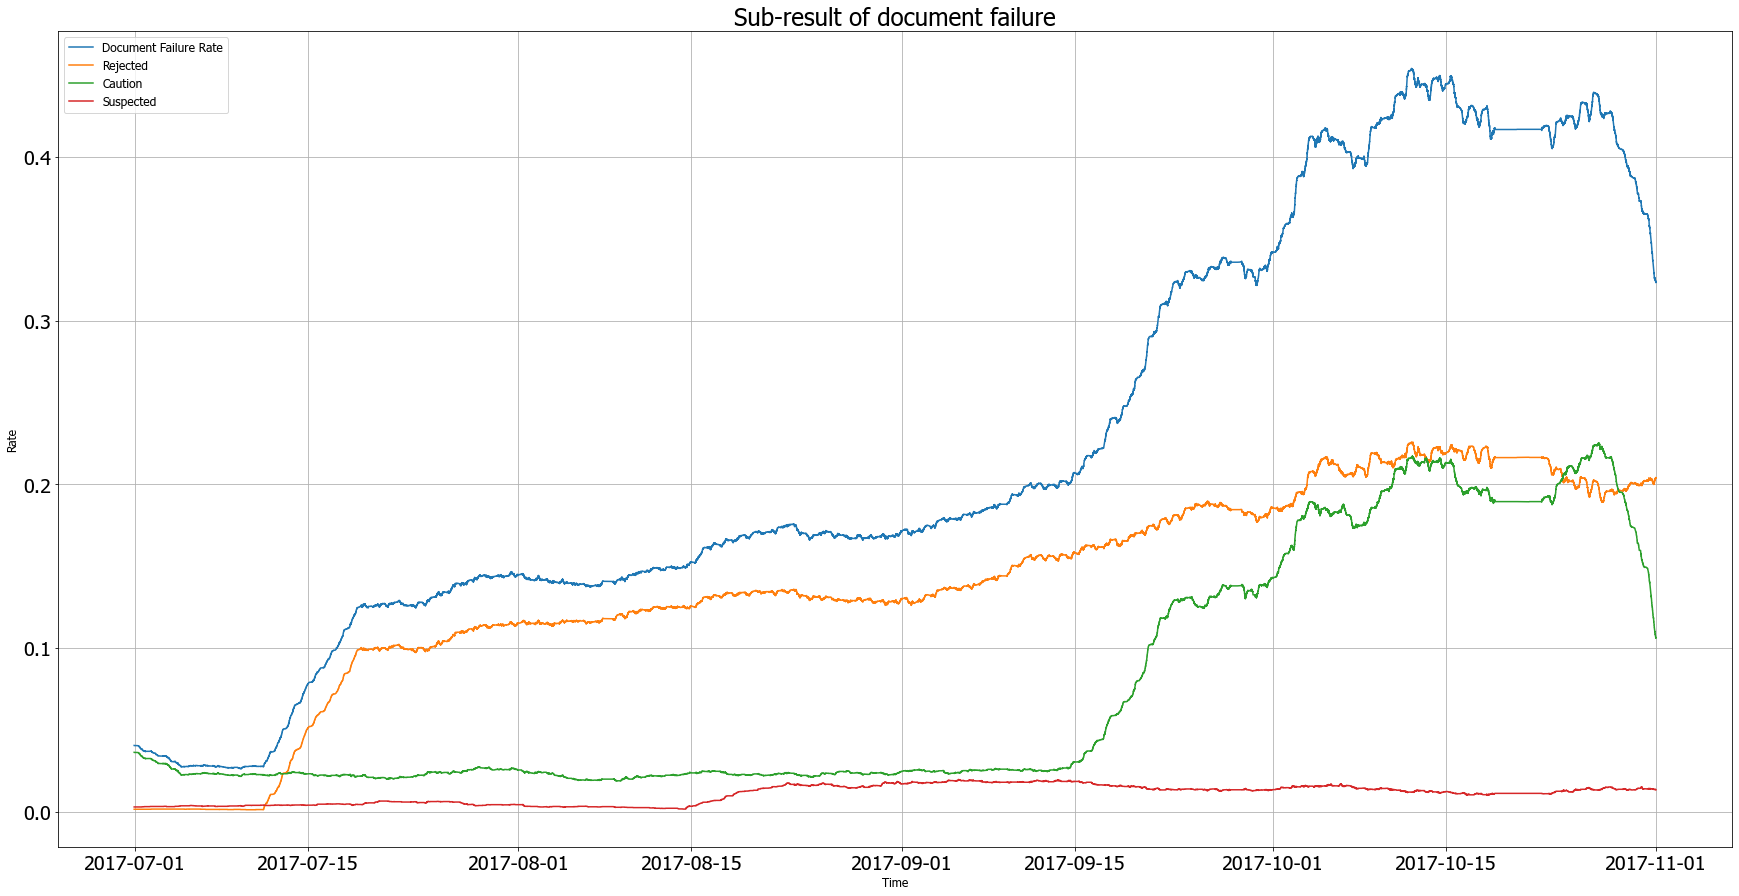

In [91]:
# trying to look into sub result for thr cases where document check failure occurs, plot the documents.
# plotting thrm against docuemnt failure rate. 
rejected = df_new['sub_result'] == 'rejected' 
caution = df_new['sub_result'] == "caution"
suspected = df_new['sub_result'] == 'suspected'
doc_failure = df_new["docs_result"] != "clear"

plot_moving_average([doc_failure,rejected,caution,suspected],['Document Failure Rate','Rejected','Caution','Suspected'],'Sub-result of document failure')

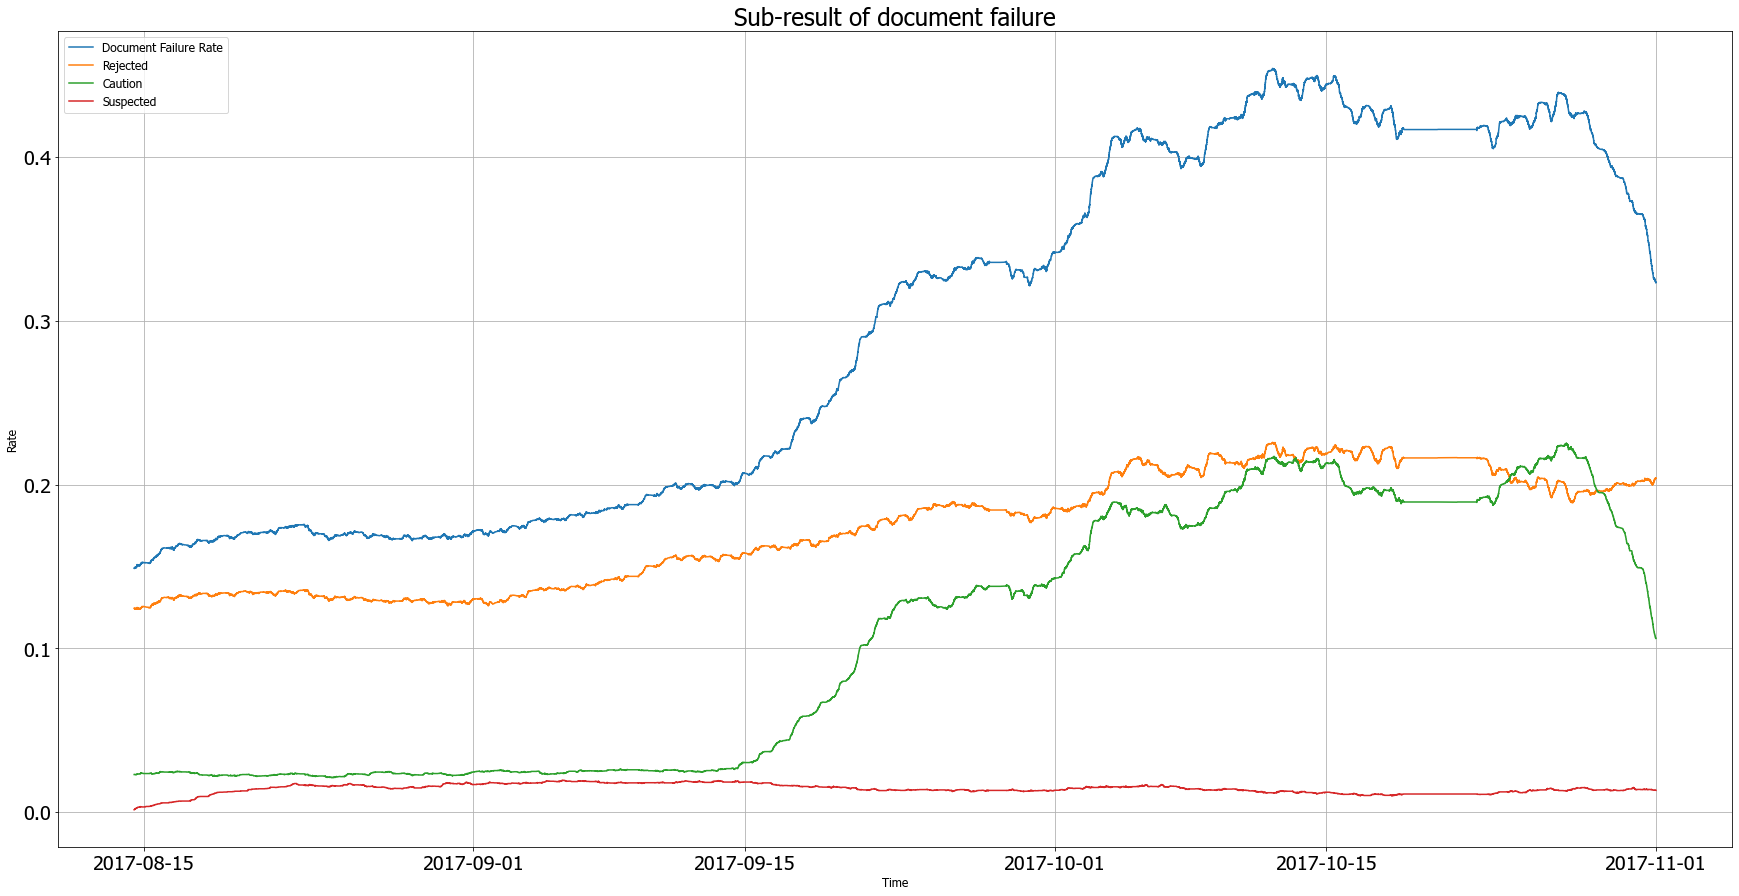

In [92]:
# takign a closer look at document failure. 
plot_moving_average([doc_failure,rejected,caution,suspected],['Document Failure Rate','Rejected','Caution','Suspected'],'Sub-result of document failure',50000)
#the graph shows that the document failure rate was mostly due the rejected documents until mid september 2017
#where failures due to 'Caution' results produce a large increase in the document failure rate after mid september. 

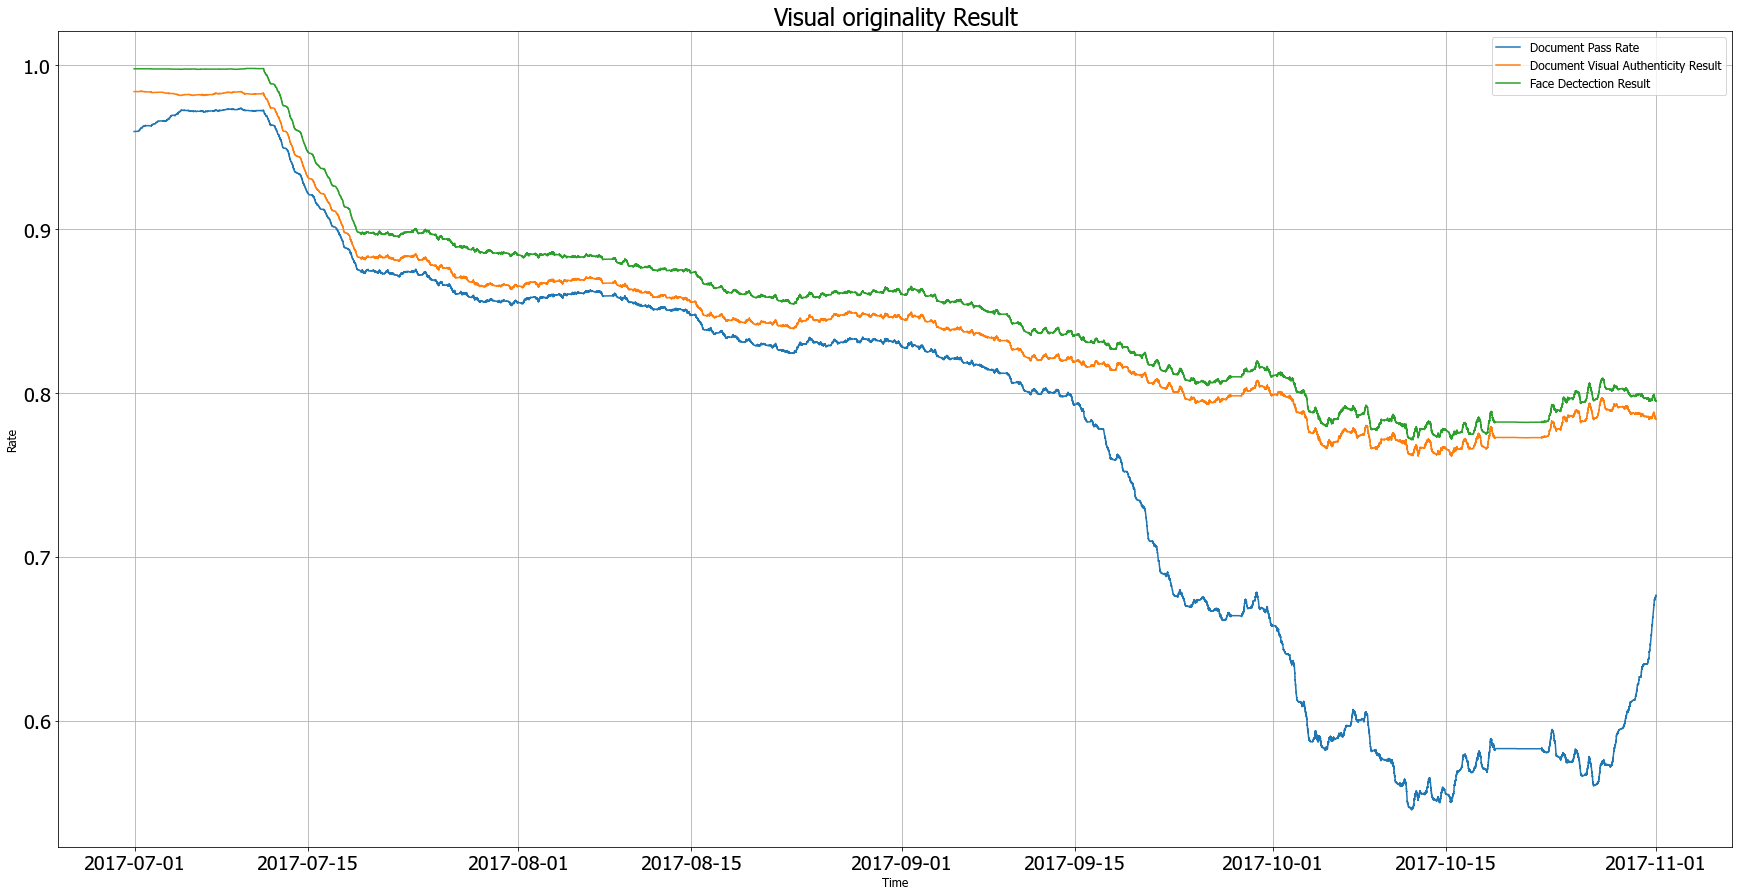

In [93]:
#document reports consist of visual originality, data integrity and police checks
# checks for the internal and external consistency of the most recent identity document provided by the aspirant user to identify inconsistency
def plot_moving_average_breakdown(variables,labels,title='',start=0,N=10000):
    for result in range(len(variables)):
        variables[result] = df_new[variables[result]] == "clear"
    plot_moving_average(variables,labels,title,start,N)
# Visual originality Result,  face detection result is a component
plot_moving_average_breakdown(['docs_result','visual_authenticity_result','face_detection_result'],['Document Pass Rate','Document Visual Authenticity Result','Face Dectection Result'],'Visual originality Result')

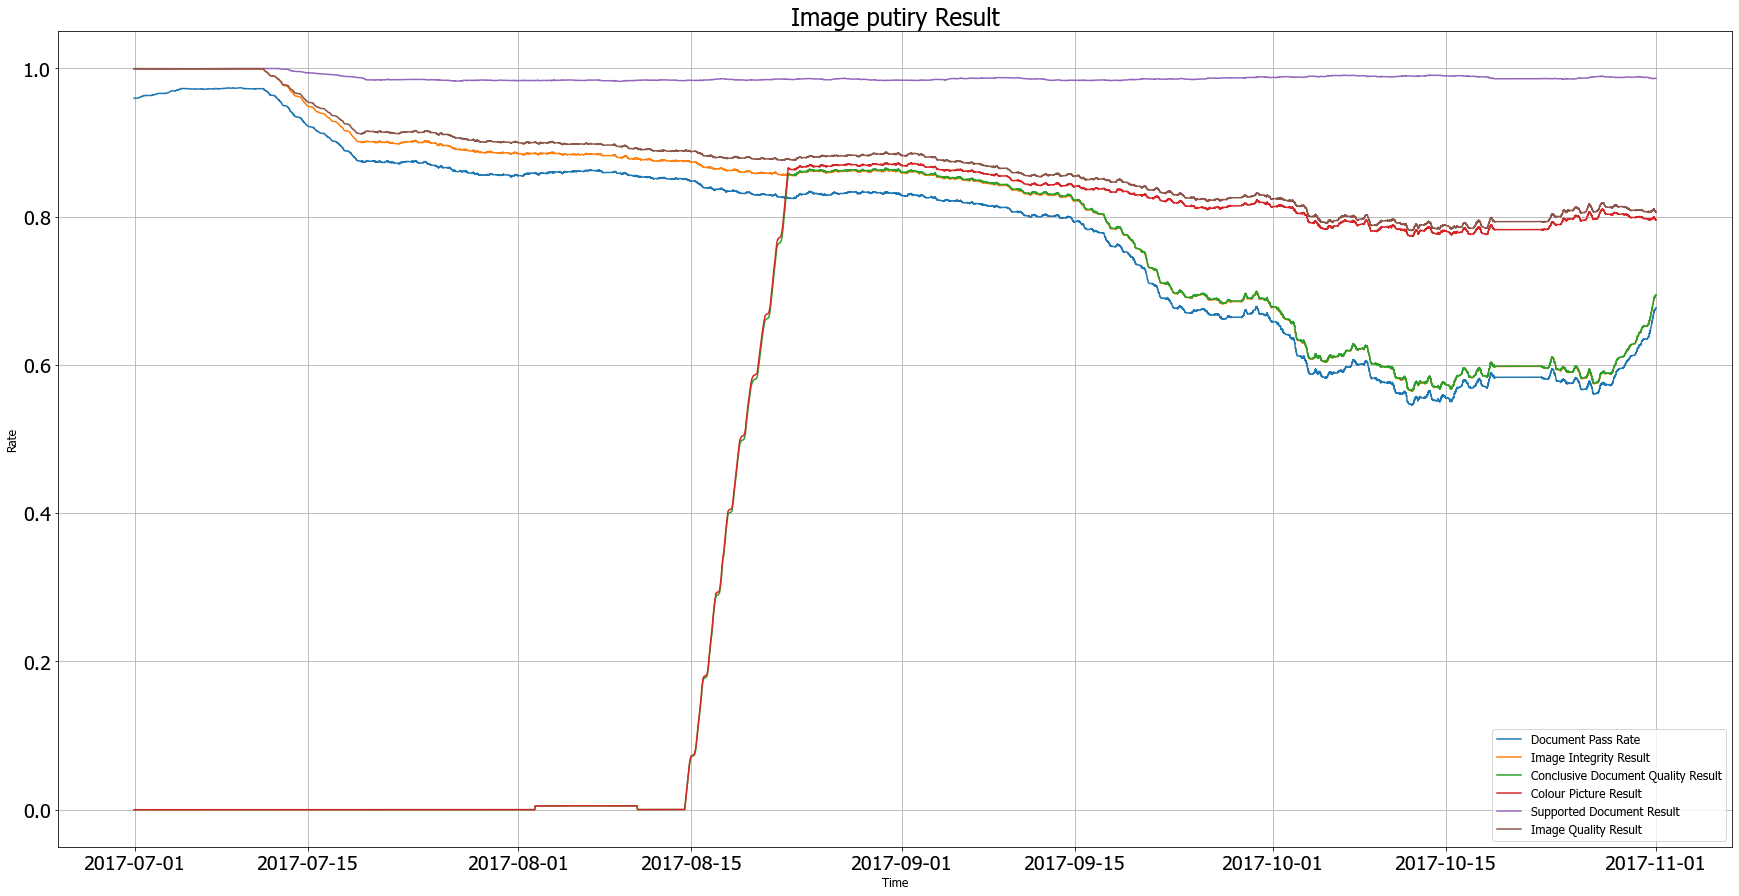

In [94]:
#image purity result , comprises of following componenet supported document , image quality, color picture and document quality 
plot_moving_average_breakdown(['docs_result','image_integrity_result','conclusive_document_quality_result','colour_picture_result','supported_document_result','image_quality_result'],['Document Pass Rate','Image Integrity Result','Conclusive Document Quality Result','Colour Picture Result','Supported Document Result','Image Quality Result'],'Image putiry Result')

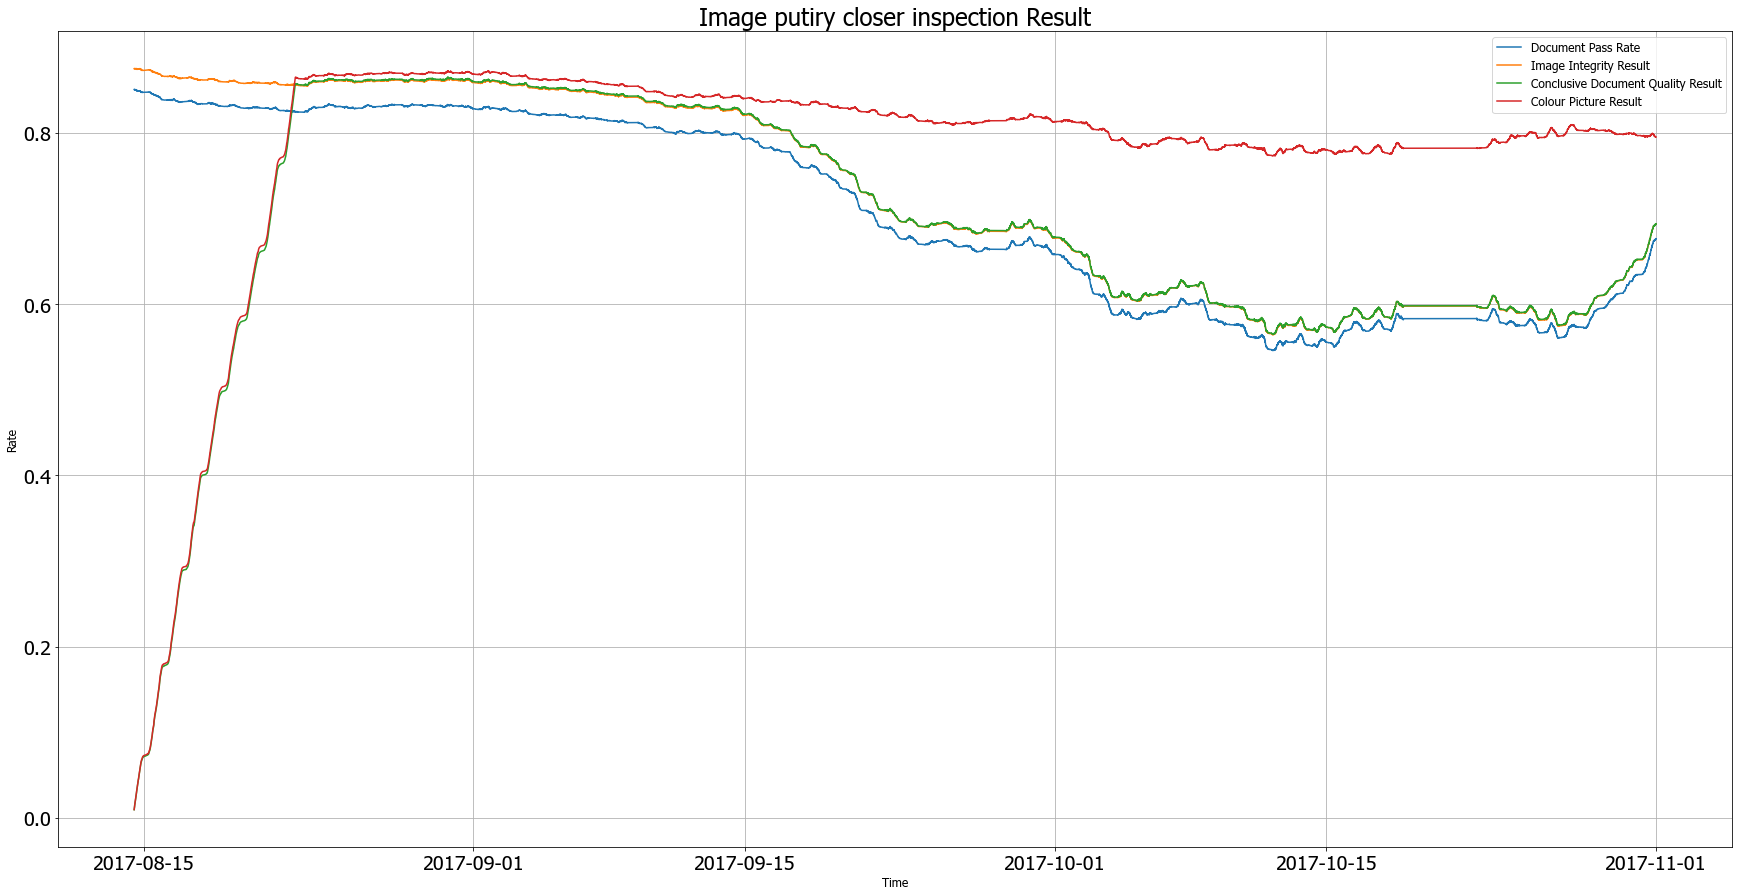

In [95]:
plot_moving_average_breakdown(['docs_result','image_integrity_result','conclusive_document_quality_result','colour_picture_result'],['Document Pass Rate','Image Integrity Result','Conclusive Document Quality Result','Colour Picture Result'],'Image putiry closer inspection Result',50000)

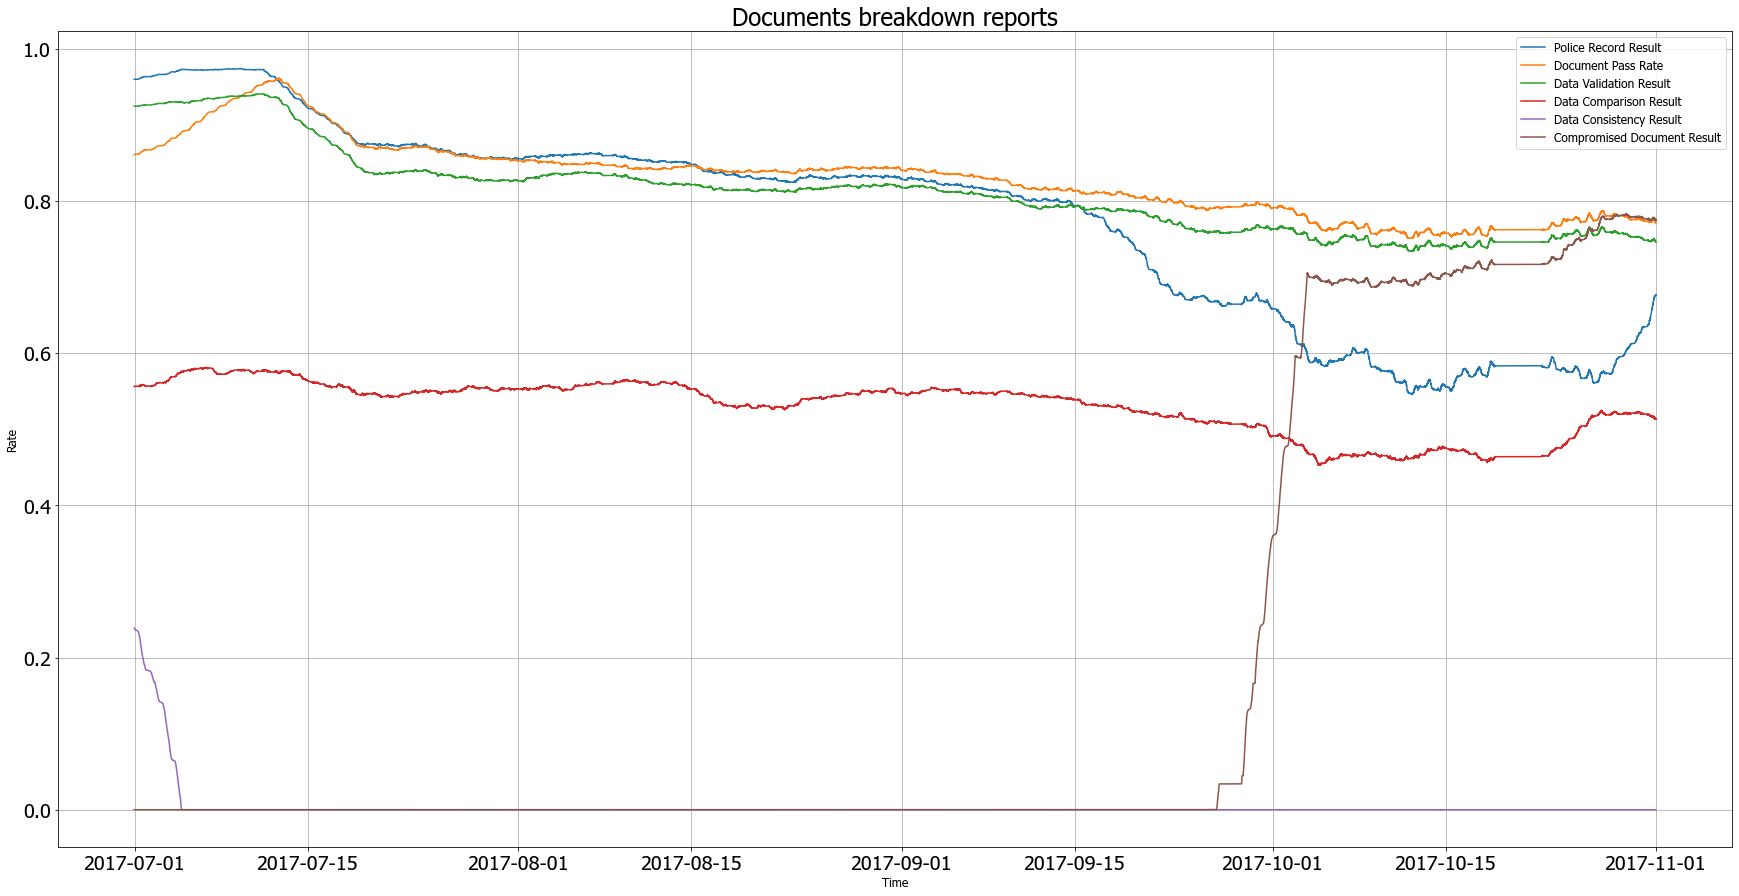

In [96]:
plot_moving_average_breakdown(['docs_result','police_record_result','data_validation_result','data_consistency_result','data_comparison_result','compromised_document_result'],['Police Record Result','Document Pass Rate','Data Validation Result','Data Comparison Result','Data Consistency Result','Compromised Document Result'],'Documents breakdown reports')
#breakdown of other documents reports doesnt singnificanlty contribute to the failure

## document properties analysis 

In [97]:
df_new.head(2)

,Unnamed: 0,user_id,face_result,face_comparison_result,face_created_at,facial_image_integrity_result,visual_authenticity_result,face_properties,face_attempt_id,docs_result,...,colour_picture_result,data_validation_result,data_consistency_result,data_comparison_result,docs_attempt_id,police_record_result,compromised_document_result,docs_properties,sub_result,Pass
0,49293,3aee7324dfba466d96888ff9ad185b58,clear,clear,2017-05-23 15:13:02+00:00,clear,clear,{'score': 0.73},d21de828c5514277aaedb316edc6c48c,clear,...,NaN,clear,NaN,clear,d21de828c5514277aaedb316edc6c48c,clear,NaN,"{'gender': 'Male', 'document_type': 'driving_l...",clear,True
1,26942,206b6bd0cc114844b471fb750e1c9b8c,consider,NaN,2017-05-23 15:18:05+00:00,consider,clear,{},b92d851b2380442cbe373c33f1c9dc44,clear,...,NaN,clear,clear,clear,b92d851b2380442cbe373c33f1c9dc44,NaN,NaN,"{'gender': 'Male', 'nationality': 'MLT', 'docu...",clear,False


In [98]:
# convertig to python dict. 
df_new['docs_properties'] = df_new['docs_properties'].apply(lambda element: ast.literal_eval(element))

In [99]:
def key_list_search():
    z = []
    for a in df_new['docs_properties']:
        for b in a:
            if b not in z:
                z.append(b)
    return z
key_list = key_list_search()
#finding the list of fileds in properties
def break_dic(index, variable):
    dictionary = df_new['docs_properties'][index]
    if variable in dictionary:
            return dictionary[variable]
#creating a seperate column for each field in properties, 'gender', 'document type', etc. 
#and it will contain correct result for each applicant
def key_columns(key_list):
    for a in key_list:
        df_new[a]= df_new.index
        df_new[a] = df_new[a].apply(lambda index: break_dic(index,a))
key_columns(key_list)

In [100]:
print(key_list)

['gender', 'document_type', 'date_of_expiry', 'issuing_country', 'nationality', 'issuing_date', 'issuing_state', 'document_version']


In [101]:
df_new.iloc[100,:]

Unnamed: 0                                                                        27029
user_id                                                0eea45ebcb3546eabd6f069fa2aa2cf5
face_result                                                                       clear
face_comparison_result                                                            clear
face_created_at                                               2017-05-24 00:46:17+00:00
facial_image_integrity_result                                                     clear
visual_authenticity_result                                                        clear
face_properties                                                         {'score': 0.63}
face_attempt_id                                        40b865295e9c4d45862005d8431b7b79
docs_result                                                                       clear
image_integrity_result                                                            clear
face_detection_result           

In [102]:
for a in key_list:
    print (df_new[a].value_counts())

Male      78397
Female    41536
8             3
FEMALE        1
MALE          1
Name: gender, dtype: int64
national_identity_card    54613
driving_licence           50492
passport                  42228
residence_permit           2929
work_permit                  17
voter_id                     11
tax_id                        7
birth_certificate             1
Name: document_type, dtype: int64
2027-05-17    86
2025-07-16    79
2018-01-30    79
2020-08-12    76
2027-03-15    75
              ..
2030-06-22     1
2030-12-04     1
2052-10-29     1
2042-03-16     1
2044-10-18     1
Name: date_of_expiry, Length: 6384, dtype: int64
GBR    39681
FRA    23522
LTU    12975
ESP     9464
IRL     9232
       ...  
FRN        1
Svn        1
BWA        1
UGA        1
MNE        1
Name: issuing_country, Length: 168, dtype: int64
GBR    12652
ESP     7763
LTU     7569
FRA     6689
POL     6143
       ...  
BWA        1
BRB        1
<<<        1
DN<        1
LSP        1
Name: nationality, Length: 208, 

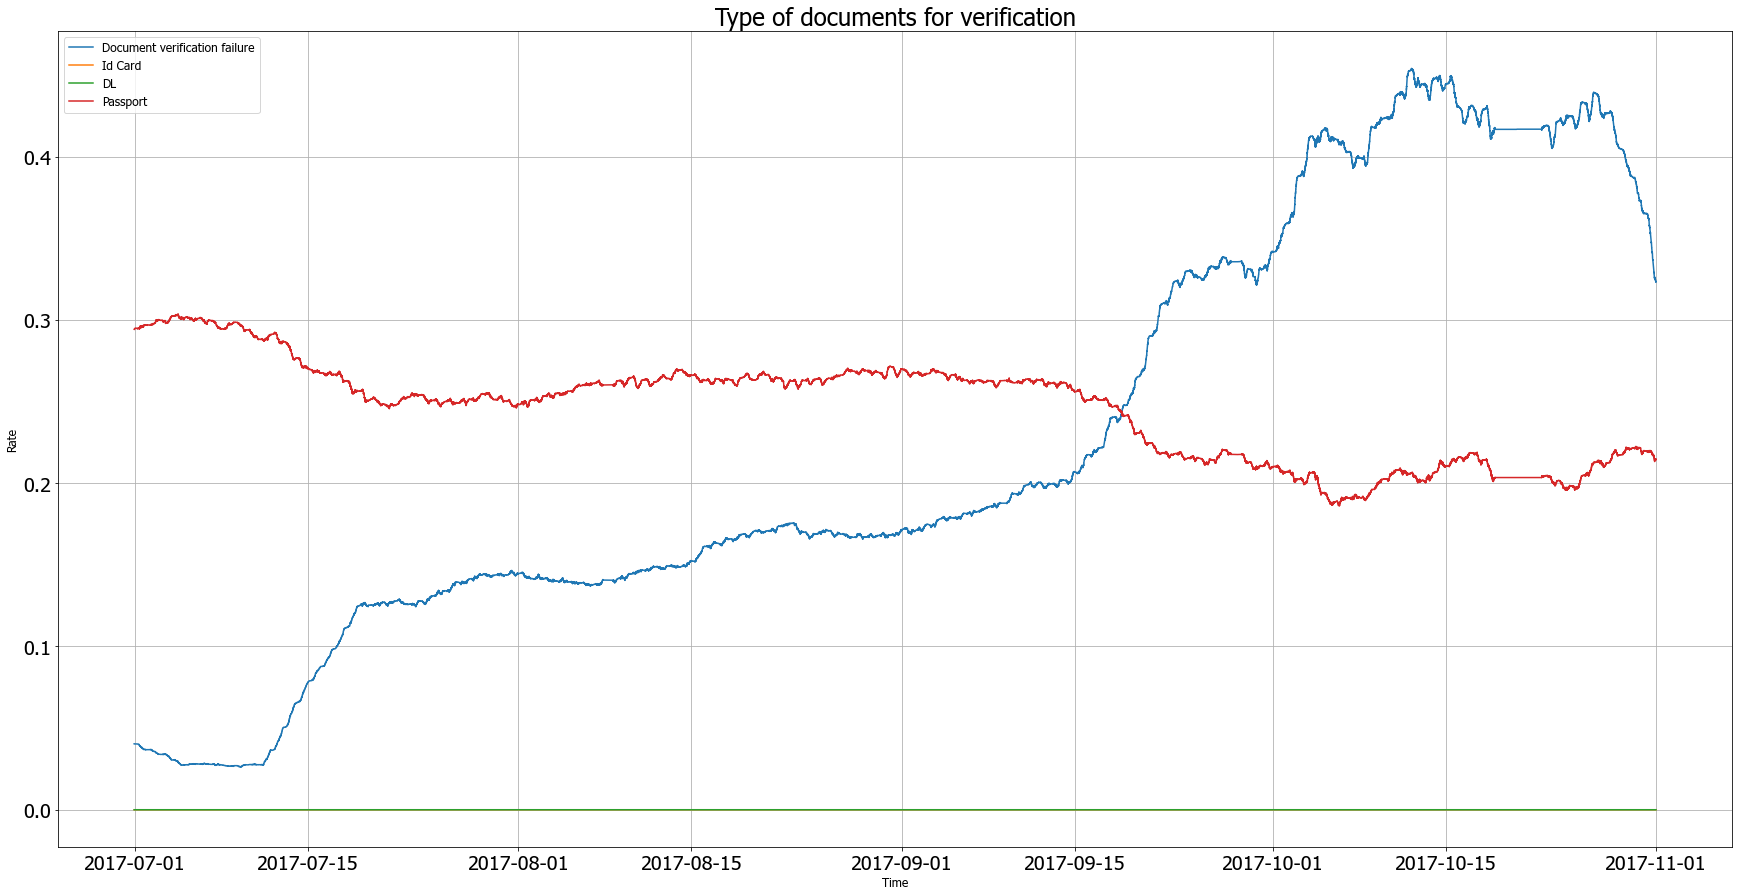

In [103]:
id_card = df_new['document_type'] == 'id_card' 
dl = df_new['document_type'] == 'dl'
passport = df_new['document_type'] == 'passport'

plot_moving_average([doc_failure,id_card,dl,passport],['Document verification failure','Id Card','DL','Passport'],'Type of documents for verification')
# there is no relationship that i can see 

In [104]:
#df_new['nationality'].unique()
#df_new['gender'].unique()
#df_new['document_version'].unique()
#df_new['document_type'].unique()

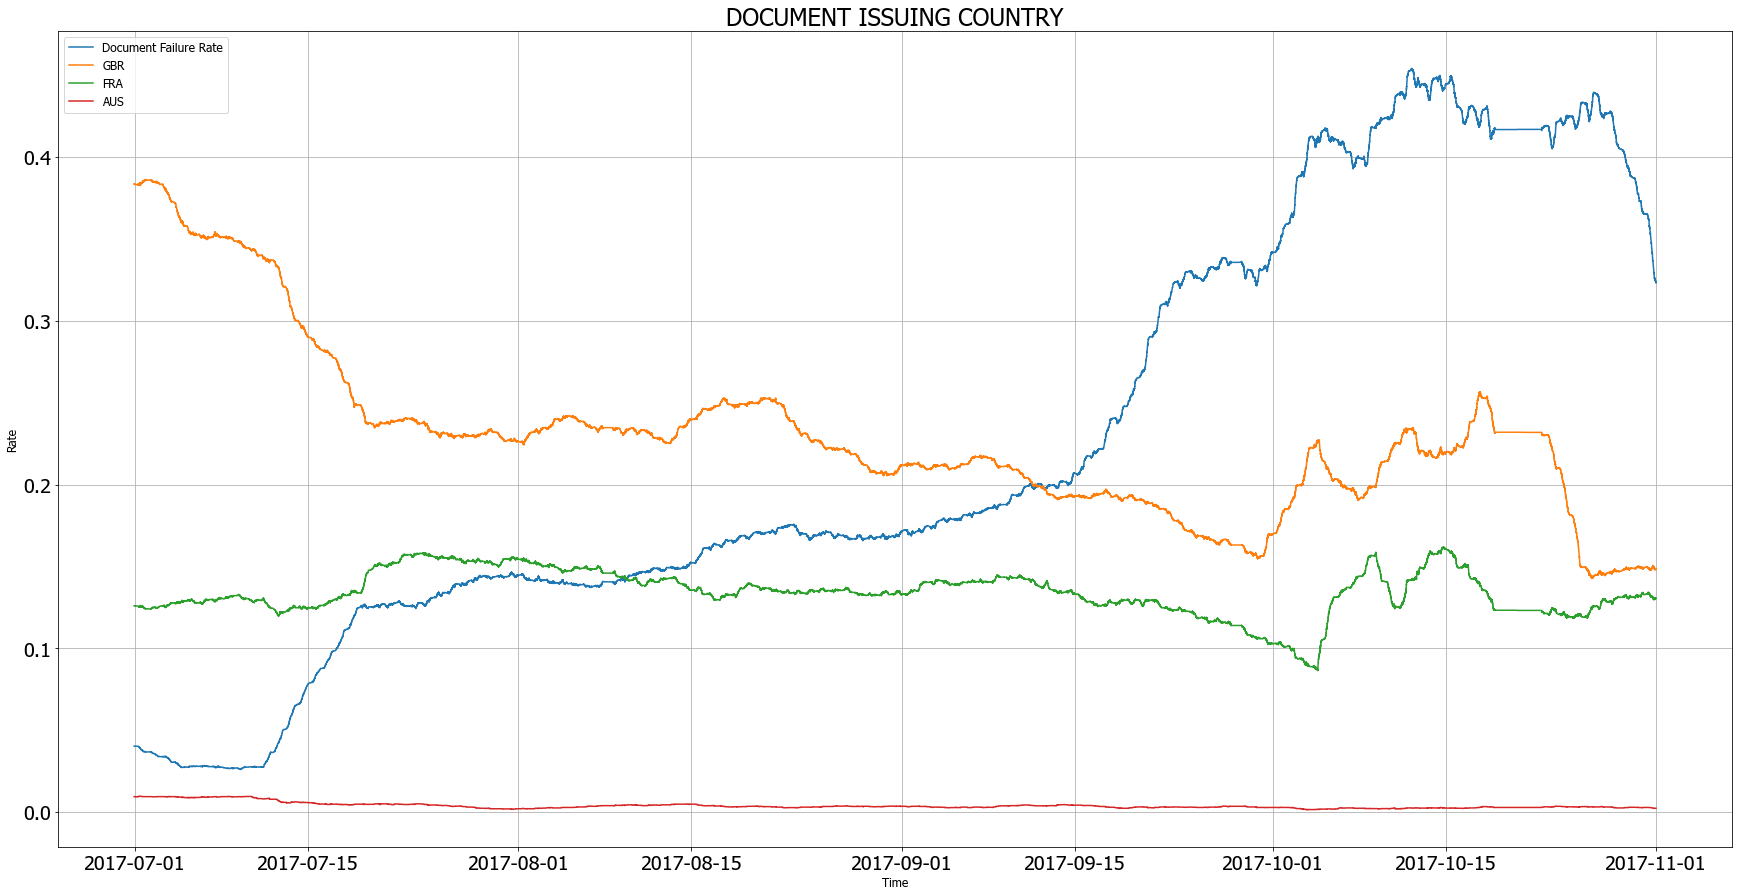

In [105]:
# checking for the trend in document failure rate according to issuing country
GBR = df_new['issuing_country'] == 'GBR' 
FRA = df_new['issuing_country'] == 'FRA'
AUS = df_new['issuing_country'] == 'AUS'
plot_moving_average([doc_failure,GBR,FRA,AUS],['Document Failure Rate','GBR','FRA','AUS'],'DOCUMENT ISSUING COUNTRY')
#there is no relationship present, and in the same manner there is no relationship for any other field as well, i have checked for all 

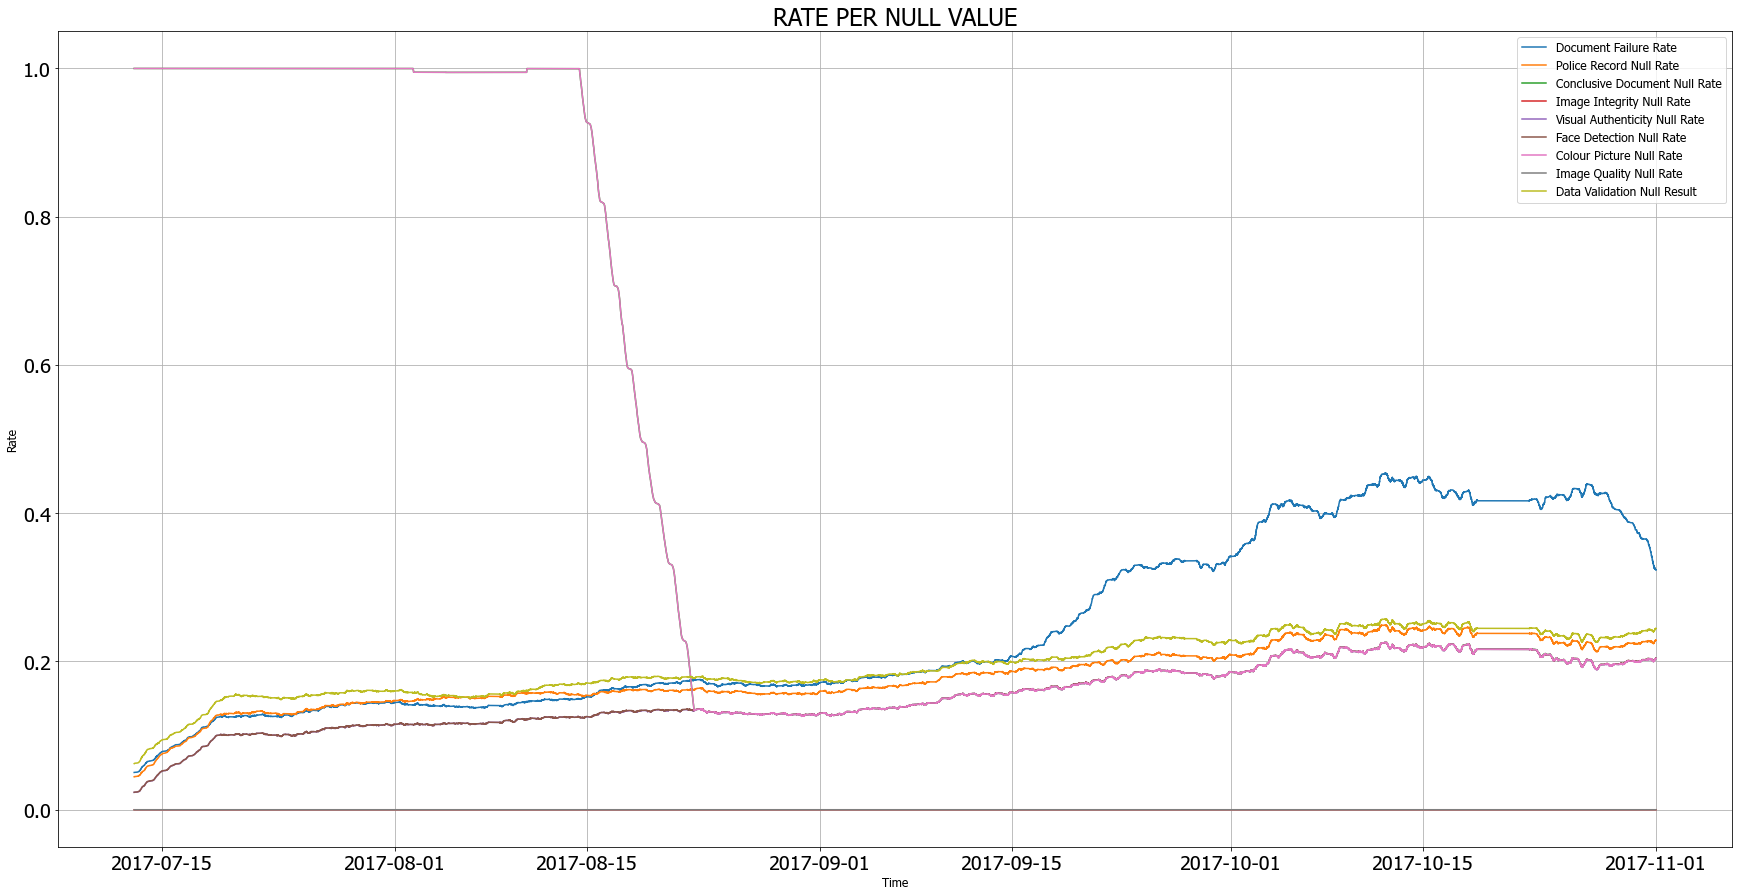

In [106]:
#increse in api not able to inputs results for come tasks can lead document failure
def plot_moving_average_Null(variables,labels,start=0,N=15000):
    for result in range(len(variables)):
        if result > 0:
            variables[result] = df_new[variables[result]].isnull()
    plot_moving_average(variables,labels,start,N)
y = [doc_failure,'police_record_result','conclusive_document_quality_result','image_integrity_result','visual_authenticity_result','face_detection_result','colour_picture_result','image_quality_result','data_validation_result']
plot_moving_average_Null(y,['Document Failure Rate','Police Record Null Rate','Conclusive Document Null Rate','Image Integrity Null Rate', 'Visual Authenticity Null Rate','Face Detection Null Rate','Colour Picture Null Rate','Image Quality Null Rate','Data Validation Null Result'],'RATE PER NULL VALUE',10000)
#identity document quality and color picture are sub check image integrity
#had null result and than conclusive document quality produced value overlappign wiyh document failure rate.